#Ejercicios modelo by Javier

##Modelo poblacional competitivo (adimensionalizado)

4. Grafique con ayuda de Python las trayectorias de este problema. ¿Qué pasa con estas poblaciones a tiempo largo? ¿Diría que pueden coexistir?


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

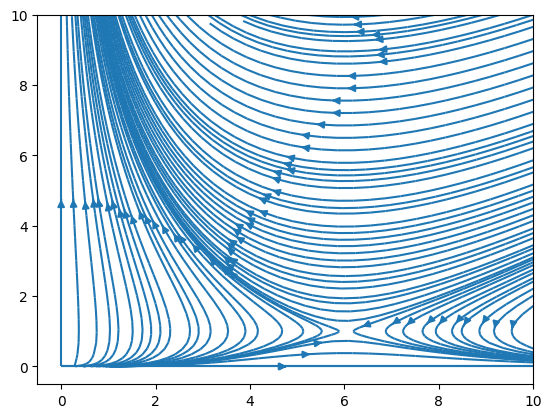

In [ ]:
alfa = 6
w_1 = 0
w_2 = 10
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = (1-Y)*X
V = (alfa - X) *Y

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

In [ ]:
from scipy import integrate

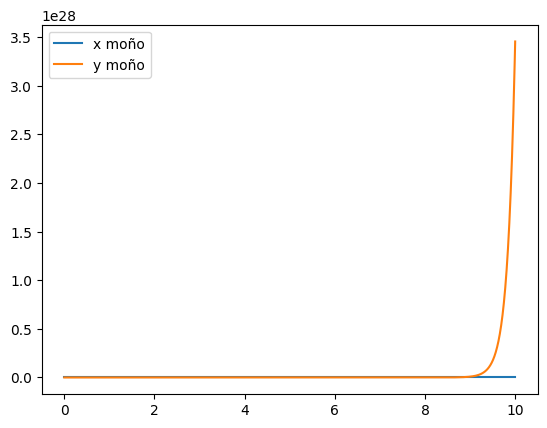

In [ ]:
x0 = 200
y0 = 500
def derivadas2(X, t, alfa):
  x , y = X
  dotx = (1-y)*x
  doty = (alfa -x)*y

  return np.array([ dotx , doty])
Nt = 1000
tmax = 10
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadas2, X0, t, args =(alfa,))
x,y= res.T
plt.plot(t,x,label="x moño")
plt.plot(t,y,label = "y moño")
plt.legend()

##Ejercicio Temperatura aire acondicionado
3. Implemente esta situación en Python, y simule dos o tres ciclos de encendido y apagado, utilizando $u_0 = 2000J/s$. Sug: programe un método de Euler básico y chequee las condiciones de activación/desactivación del aire acondicionado al final de cada paso, dentro de un bucle (loop). Esto podría hacerse de manera más fina, pero más compleja, usando eventos dentro del solver de ecuaciones diferenciales ordinarias: es un ejemplo de un caso en que para hacer las cosas rápido y simple es mejor programar a mano la resolución de la ODE en vez de llamar a códigos más elaborados.

In [ ]:
Tr = 24
Ta = 32
delta = 2
C = 7.2e6
alfa = 200
u0 = 7.2e6
T0 = 30
#G sera la que uso cuando esta apagado y F cuando esta prendido

def F(T):
  return ((alfa*(Ta-T)-u0)/C)

def G(T):
  return (((alfa)*(Ta-T)+u0)/C)

In [ ]:
def eulerEspecial(t0, T0, h, tf,u0):
    pasos = int((tf - t0) / h)
    t = np.linspace(t0, tf, pasos+1)
    x = np.zeros(pasos+1)

    x[0] = T0

    colores = []

    #prendo aire
    prendido = True
    for i in range(1, pasos+1):
      if (prendido):
        if(x[i-1] > Tr-delta):
          x[i] = x[i-1] + h * F(x[i-1])
          colores.append('blue')
        else:
          prendido = False
          x[i] = x[i-1] + h * G(x[i-1])
          colores.append('red')
      else:
        if(x[i-1]>= Tr+delta):
          prendido = True
          x[i] = x[i-1] + h * F(x[i-1])
          colores.append('green')
        else:
          x[i] = x[i-1] + h * G(x[i-1])
          colores.append('yellow')

    return t, x, colores

#(x1,y1)=eulerEspecial(0,T0,0.5,100,u0)
#print(y1)

In [ ]:
t, x, col = eulerEspecial(0,T0,0.5,20000,u0)

for i in range(len(t) - 1):
    plt.plot([t[i], t[i+1]], [x[i], x[i+1]], color=col[i], linewidth=2)

plt.xlim(0,4000)
plt.ylim(0,40)

NameError: name 'eulerEspecial' is not defined

In [ ]:
help()

##Ejercicio skydiver

In [ ]:
def v(t):
  return 55*((-np.exp(2*(1/55)*t)+1)/(np.exp(2*(1/55)*t)+1))

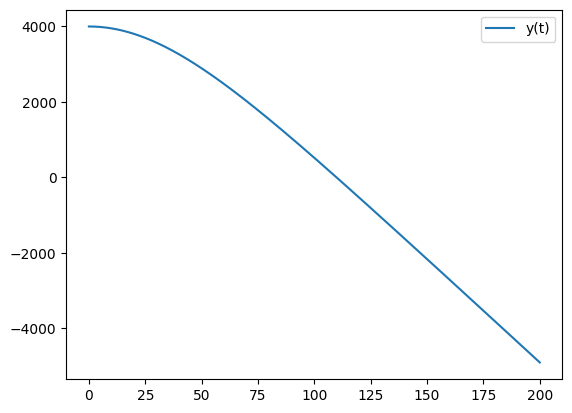

In [ ]:
x0 = 4000
def derivadas2(v,t):
  doty = 55*((-np.exp(2*(1/55)*t)+1)/(np.exp(2*(1/55)*t)+1))


  return np.array(doty)

Nt = 1000
tmax = 200
t = np.linspace(0,tmax,Nt)
X0 = [x0]
res = integrate.odeint(derivadas2, X0, t)
x = res

plt.plot(t,x,label ="y(t)")


plt.legend()

Veamos a que tiempo llega a altura 800: buscando vemos que es a t = 94

In [ ]:
k = zip(x,t)
for i in k:
  print(i)
#posicion, tiempo

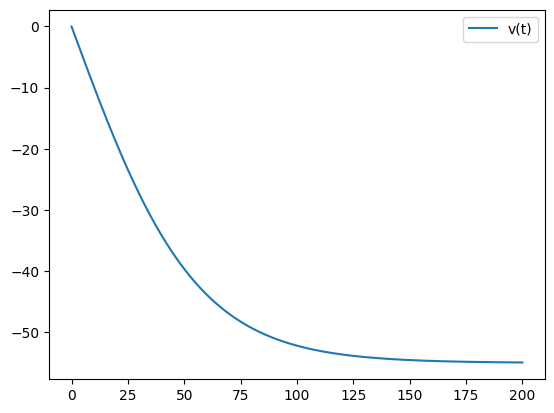

In [ ]:
plt.plot(t,55*((-np.exp(2*(1/55)*t)+1)/(np.exp(2*(1/55)*t)+1)),label ="v(t)")
plt.legend()

Ahora abro el paracaidas

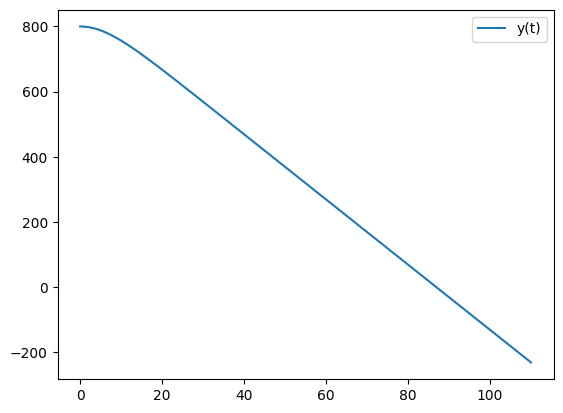

In [ ]:
x0 = 800
def derivadas2(v,t):
  doty = 10*((-np.exp(2*(1/10)*t)+1)/(np.exp(2*(1/10)*t)+1))
  return np.array(doty)

Nt = 1000
tmax = 110
t = np.linspace(0,tmax,Nt)
X0 = [x0]
res = integrate.odeint(derivadas2, X0, t)
x = res

plt.plot(t,x,label ="y(t)")
plt.legend()

In [ ]:
k = zip(x,t)
for i in k:
  print(i)
#posicion, tiempo
#vemos que llega a la altura 0 en tiempo 86.87


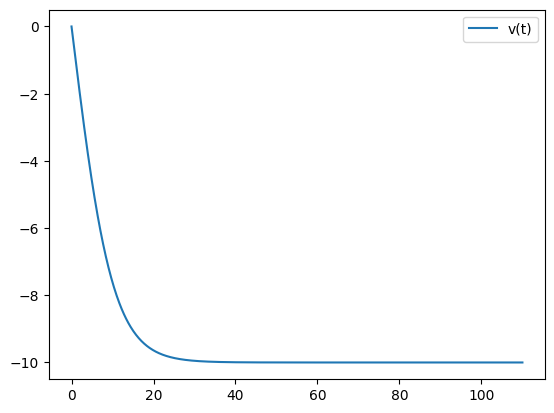

In [ ]:
plt.plot(t,10*((-np.exp(2*(1/10)*t)+1)/(np.exp(2*(1/10)*t)+1)),label ="v(t)")

plt.legend()